<a href="https://colab.research.google.com/github/angelomarcelino/machine_learning/blob/main/lista_3/q4_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/angelomarcelino/machine_learning/main/lista_3/q3_data.csv')
data.drop(columns='pais', inplace=True)
data.head()
data = data.to_numpy()
data[:5]

array([[0.88, 0.99, 0.91, 1.1 ],
       [0.9 , 0.99, 0.93, 1.26],
       [0.9 , 0.98, 0.94, 1.24],
       [0.87, 0.98, 0.97, 1.18],
       [0.93, 0.93, 0.93, 1.2 ]])

In [3]:
from minisom import MiniSom

som = MiniSom(
    10, 10, 4, 
    sigma=1.5, learning_rate=.7,
    activation_distance='euclidean', 
    topology='hexagonal', 
    neighborhood_function='gaussian'
)

som.train(data, 100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.07506696176373732


In [4]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

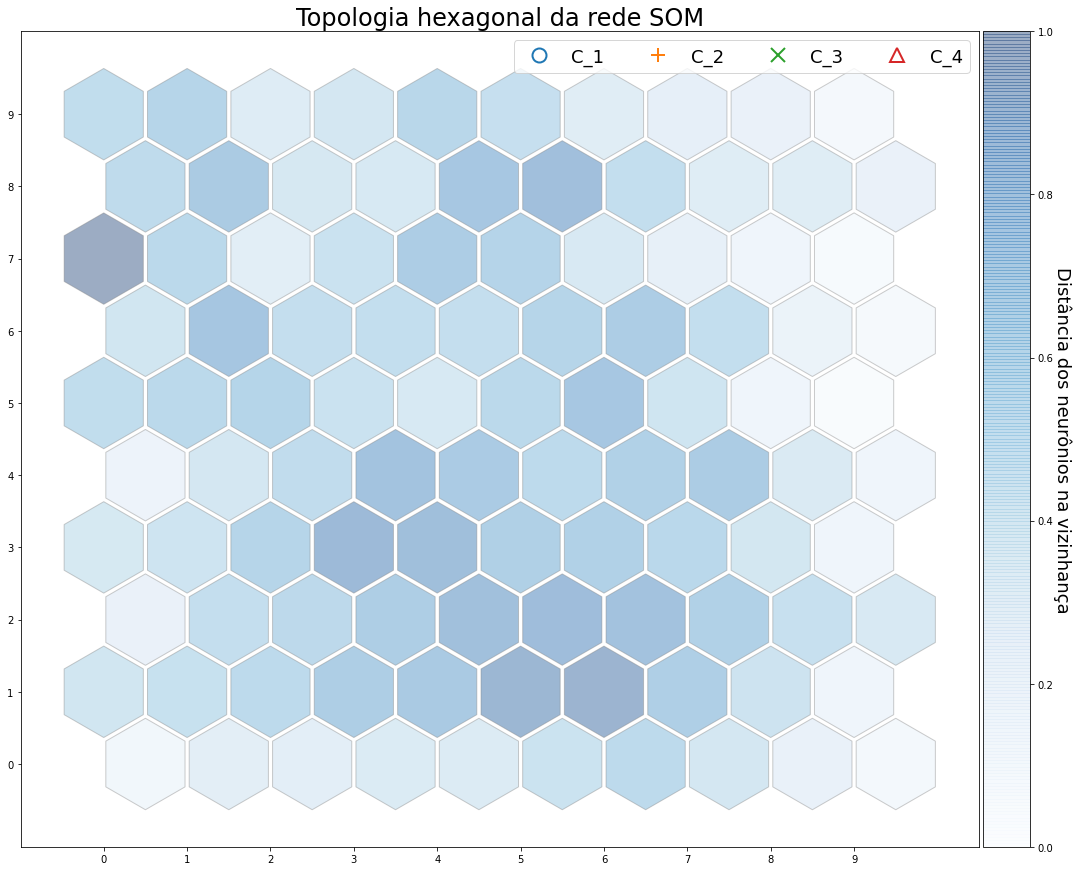

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import RegularPolygon
from matplotlib import pyplot as plt
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

f = plt.figure(figsize=(22, 15))
ax = f.add_subplot(111)

ax.set_aspect('equal')

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
        hex = RegularPolygon(
            (xx[(i, j)], wy), 
            numVertices=6, 
            radius=.95 / np.sqrt(3),
            facecolor=cm.Blues(umatrix[i, j]), 
            alpha=.4, 
            edgecolor='gray'
        )
        ax.add_patch(hex)

markers = ['o', '+', 'x', '^']
colors = ['C0', 'C1', 'C2', 'C3']
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy * 2 / np.sqrt(3) * 3 / 4
    plt.plot(
        wx, wy, 
        #markers[y[cnt]-1], 
        markerfacecolor='None',
        #markeredgecolor=colors[y[cnt]-1], 
        markersize=12, 
        markeredgewidth=2
    )

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 18
cb1.ax.set_ylabel('Distância dos neurônios na vizinhança', rotation=270, fontsize=18)
plt.gcf().add_axes(ax_cb)

legend_elements = [
    Line2D([0], [0], marker='o', color='C0', label='C_1', markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='+', color='C1', label='C_2', markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='x', color='C2', label='C_3',markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='^', color='C3', label='C_4',markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)
]

ax.set_title('Topologia hexagonal da rede SOM', fontsize=24)
ax.legend(handles=legend_elements, loc='upper right', ncol=4, fontsize=18)

#plt.tight_layout()
plt.show()